In [2]:
import tensorflow as tf
import tqdm
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2
import os
import shutil
import random

import util


random.seed(42)
mobilenet = tf.keras.applications.mobilenet
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

In [7]:
PWD = os.getcwd()

In [10]:
def get_random_photos(directory, n = 100):
    files = os.listdir(directory)
    random.shuffle(files)
    return [os.path.join(os.path.abspath(directory), f) for f in files[:n] 
            if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg') or f.lower().endswith('.png')]

In [11]:
MODEL_NAME = "is-penny"
NUMBER_OF_FILES = len(FILES)
tr_idx = int(NUMBER_OF_FILES * 0.75)
TRAINING_FILES = FILES[:tr_idx]
VALIDIATION_FILES = FILES[tr_idx:]

In [12]:
# make the necessary folders for data
model_folder = os.path.join(PWD, MODEL_NAME+'-model-v1')
if not os.path.isdir(model_folder):
    DATA_DIRECTORY = os.path.join(PWD, "images/penny_pics")
    FILES = [os.path.join(os.path.abspath(DATA_DIRECTORY), f) for f in os.listdir(DATA_DIRECTORY) if f.endswith('.jpg')]
    random.shuffle(FILES)
    
    os.makedirs(model_folder)
    os.makedirs(os.path.join(model_folder, 'data'))
    os.makedirs(os.path.join(model_folder, 'data', 'train'))
    os.makedirs(os.path.join(model_folder, 'data', 'train', 'penny'))
    os.makedirs(os.path.join(model_folder, 'data', 'train', 'not_penny'))
    os.makedirs(os.path.join(model_folder, 'data', 'valid'))
    os.makedirs(os.path.join(model_folder, 'data', 'valid', 'penny'))
    os.makedirs(os.path.join(model_folder, 'data', 'valid', 'not_penny'))
    
    for src in TRAINING_FILES:
        shutil.copy2(src, os.path.join(model_folder, 'data', 'train', 'penny'))

    for src in VALIDIATION_FILES:
        shutil.copy2(src, os.path.join(model_folder, 'data', 'valid', 'penny'))
    
    


In [231]:
REBUILD_TRAINING_DATA = False
NP_TRAIN_DIR = os.path.join(model_folder, 'data', 'train', 'not_penny')
NP_VALID_DIR = os.path.join(model_folder, 'data', 'valid', 'not_penny')
P_TRAIN_DIR = os.path.join(model_folder, 'data', 'train', 'penny')
P_VALID_DIR = os.path.join(model_folder, 'data', 'valid', 'penny')

if REBUILD_TRAINING_DATA:
    RANDOM_100_DOG_PHOTOS = get_random_photos('./images/random_dog_photos', n = 100)
    RANDOM_500_PHOTOS = get_random_photos('./images/ILSVRC/Data/DET/test', n = 500)
    all_rand_photos = RANDOM_200_DOG_PHOTOS[:] + RANDOM_1000_PHOTOS[:]
    random.shuffle(all_rand_photos)
    idx = int(len(all_rand_photos) * 0.75)
    all_rand_photos_train = all_rand_photos[:idx]
    all_rand_photos_valid = all_rand_photos[idx:]



    if os.path.isdir(NP_TRAIN_DIR):
        shutil.rmtree(NP_TRAIN_DIR)

    if os.path.isdir(NP_VALID_DIR):
        shutil.rmtree(NP_VALID_DIR)

    os.makedirs(NP_TRAIN_DIR)    
    os.makedirs(np_valid_dir)

    for src in all_rand_photos_train:
        shutil.copy2(src, NP_TRAIN_DIR)

    for src in all_rand_photos_valid:
        shutil.copy2(src, np_valid_dir)

print(NP_TRAIN_DIR, len(os.listdir(NP_TRAIN_DIR)))
print(NP_VALID_DIR, len(os.listdir(NP_VALID_DIR)))
print(P_TRAIN_DIR, len(os.listdir(P_TRAIN_DIR)))
print(P_VALID_DIR, len(os.listdir(P_VALID_DIR)))
    
    

/Users/mwoods/Developer/Repo/trxsfr-learning-web-app/is-penny-model-v1/data/train/not_penny 450
/Users/mwoods/Developer/Repo/trxsfr-learning-web-app/is-penny-model-v1/data/valid/not_penny 150
/Users/mwoods/Developer/Repo/trxsfr-learning-web-app/is-penny-model-v1/data/train/penny 57
/Users/mwoods/Developer/Repo/trxsfr-learning-web-app/is-penny-model-v1/data/valid/penny 20


## Training the Model

In [224]:
train_generator = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [225]:
mob_net_bottleneck = util.mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [227]:
train_gen = aug_generator.flow_from_directory(
        directory = os.path.join(model_folder, 'data', 'train'),
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

NUMBER_OF_BATCHES = 100
X_train = None
y_train = None

for idx, data in enumerate(g):
    if idx < NUMBER_OF_BATCHES:
        x, y = data
        x = util.mobilenet.preprocess_input(x.copy())
        preds = mob_net_bottleneck.predict(x, verbose = 1)
        if X_train is None:
            X_train = preds
        else:
            X_train = np.vstack((X_train, preds))
            
        
        if y_train is None:
            y_train = y
        else:
            y_train = np.hstack((y_train, y))

        print('batch', idx, X_train.shape, y_train.shape)
    else:
        break

Found 507 images belonging to 2 classes.
32/32 [==============================] - 2s
batch 0 (32, 1024) (32,)
32/32 [==============================] - 1s
batch 1 (64, 1024) (64,)
27/27 [==============================] - 2s
batch 2 (91, 1024) (91,)
32/32 [==============================] - 2s
batch 3 (123, 1024) (123,)
32/32 [==============================] - 2s
batch 4 (155, 1024) (155,)
32/32 [==============================] - 1s
batch 5 (187, 1024) (187,)
32/32 [==============================] - 2s
batch 6 (219, 1024) (219,)
32/32 [==============================] - 2s
batch 7 (251, 1024) (251,)
32/32 [==============================] - 2s
batch 8 (283, 1024) (283,)
32/32 [==============================] - 2s
batch 9 (315, 1024) (315,)
32/32 [==============================] - 1s
batch 10 (347, 1024) (347,)
32/32 [==============================] - 2s
batch 11 (379, 1024) (379,)
32/32 [==============================] - 2s
batch 12 (411, 1024) (411,)
32/32 [==============================] 

In [232]:
from sklearn.utils import class_weight

In [233]:
weights = class_weight.compute_class_weight('balanced', [0, 1], y_train)
weights

array([ 0.56376915,  4.42039106])

In [250]:

model = tf.keras.models.Sequential()
model.reset_states()
model.add(tf.keras.layers.Flatten(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#adam = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_train, y_train,
          epochs=50,
          batch_size=32,
          validation_data=(x_val, y_val),
          class_weight='balanced')

Train on 3165 samples, validate on 170 samples
Epoch 1/50
3165/3165 [==============================] - 1s - loss: 0.2408 - acc: 0.9131 - val_loss: 0.1023 - val_acc: 0.9588
Epoch 2/50
3165/3165 [==============================] - 0s - loss: 0.0991 - acc: 0.9633 - val_loss: 0.0751 - val_acc: 0.9706
Epoch 3/50
3165/3165 [==============================] - 0s - loss: 0.0741 - acc: 0.9731 - val_loss: 0.0669 - val_acc: 0.9765
Epoch 4/50
3165/3165 [==============================] - 0s - loss: 0.0583 - acc: 0.9826 - val_loss: 0.0596 - val_acc: 0.9824
Epoch 5/50
3165/3165 [==============================] - 0s - loss: 0.0459 - acc: 0.9852 - val_loss: 0.0546 - val_acc: 0.9824
Epoch 6/50
3165/3165 [==============================] - 0s - loss: 0.0422 - acc: 0.9867 - val_loss: 0.0517 - val_acc: 0.9824
Epoch 7/50
3165/3165 [==============================] - 0s - loss: 0.0359 - acc: 0.9886 - val_loss: 0.0498 - val_acc: 0.9824
Epoch 8/50
3165/3165 [==============================] - 0s - loss: 0.0331 - ac

In [290]:
pred_model_folder = os.path.join(model_folder, 'model') 

if not os.path.isdir(pred_model_folder):
    os.makedirs(pred_model_folder)


#save model 
snapshot_folder = os.path.join(pred_model_folder, dt.datetime.today().strftime('model-snapshot-%Y-%m-%d-%H-%M-%S'))
if not os.path.isdir(snapshot_folder):
    os.makedirs(snapshot_folder)
    
with open(os.path.join(snapshot_folder, 'models.json'), 'w') as f:
    f.write(model.to_json())

model.save_weights(os.path.join(snapshot_folder, 'weights.hdf5'))

In [291]:
most_recent_snapshot = sorted(os.listdir(pred_model_folder), reverse=True)[0]
most_recent_ss_dir = os.path.join(pred_model_folder, most_recent_snapshot)
print(most_recent_ss_dir)

/Users/mwoods/Developer/Repo/trxsfr-learning-web-app/is-penny-model-v1/model/model-snapshot-2017-11-19-13-11-21


In [292]:
with open(os.path.join(most_recent_ss_dir, 'models.json'), 'r') as f:
    model2 = tf.keras.models.model_from_json(f.read())
model2.load_weights(os.path.join(most_recent_ss_dir, 'weights.hdf5'))

## Review Residuals

In [296]:
NUM_VALID_FILES = len(os.listdir(NP_VALID_DIR)) + len(os.listdir(P_VALID_DIR))
print(NUM_VALID_FILES)


valid_generator = ImageDataGenerator()

valid_gen = valid_generator.flow_from_directory(
    directory=os.path.join(model_folder, 'data', 'valid'),
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode='binary'
)

170
Found 170 images belonging to 2 classes.


In [286]:
x_img = None
x_val = None
y_val = None
y_preds = None
ct = 0
for idx, data in enumerate(valid_gen):
    ct += data[0].shape[0]
    
    if ct > NUM_VALID_FILES:
        print('done')
        break
    else:
        x, y = data
        x_pp = util.mobilenet.preprocess_input(x.copy())
        feats = mob_net_bottleneck.predict(x_pp, verbose = 1)
        preds = model2.predict(feats, verbose = 1)
        if x_val is None:
            x_img = x
            x_val = feats
            y_val = y
            y_preds = preds
        else:
            x_img = np.vstack((x_img, x))
            x_val = np.vstack((x_val, feats))
            y_val = np.hstack((y_val, y))
            y_preds = np.vstack((y_preds, preds))
    print(x_img.shape)
    print(x_val.shape)
    print(y_val.shape)
    print(y_preds.shape)

32/32 [==============================] - 0s
(32, 224, 224, 3)
(32, 1024)
(32,)
(32, 1)
32/32 [==============================] - 0s
(64, 224, 224, 3)
(64, 1024)
(64,)
(64, 1)
10/10 [==============================] - 0s
(74, 224, 224, 3)
(74, 1024)
(74,)
(74, 1)
32/32 [==============================] - 0s
(106, 224, 224, 3)
(106, 1024)
(106,)
(106, 1)
32/32 [==============================] - 0s
(138, 224, 224, 3)
(138, 1024)
(138,)
(138, 1)
32/32 [==============================] - 0s
(170, 224, 224, 3)
(170, 1024)
(170,)
(170, 1)
done


0.982352941176


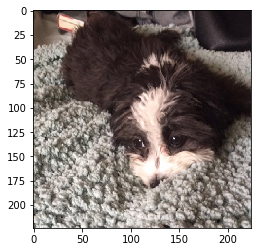

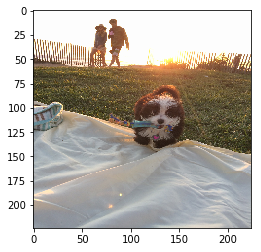

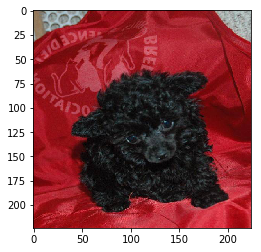

In [305]:

acc_vector = ((y_preds > 0.5).astype('uint8') == y_val.reshape((-1, 1)))
print(acc_vector.mean())
mis_class = x_img[~acc_vector.reshape((170,))]
for i in range(mis_class.shape[0]):
    plt.imshow(mis_class[i].astype('uint8'))
    plt.show()

## Testing out performance of LR

In [315]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
(lr.predict(X_train) == y_train).mean()
val_acc = (lr.predict(x_val) == y_val).mean()
print((lr.predict(x_val) == y_val).mean())
print((lr.predict(x_val) != y_val).sum())

0.976470588235
4


[ 0.44443107  0.55556893] 0.0


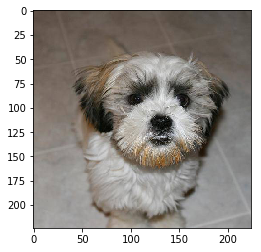

[ 0.9137292  0.0862708] 1.0


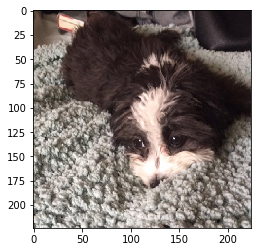

[ 0.808861  0.191139] 1.0


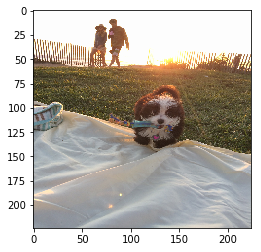

[ 0.11739623  0.88260377] 0.0


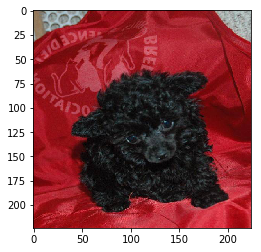

In [333]:
mis_class_vector = (lr.predict(x_val) != y_val)
mis_class = x_img[mis_class_vector]
for i in range(mis_class.shape[0]):
    print(lr.predict_proba(x_val)[mis_class_vector][i], y_val[mis_class_vector][i])
    plt.imshow(mis_class[i].astype('uint8'))
    plt.show()

In [327]:
import pickle

In [335]:
dt.datetime.today().strftime('%Y-%m-%d-%H-%M-%S')
'{date}'.format(date = dt.datetime.today().strftime('%Y-%m-%d-%H-%M-%S'))

'2017-11-19-19-04-43'

In [337]:
fname_tmplt = 'sklearn-lr-acc-{val_acc:.5f}-{date}.pkl'
f_out = fname.format(val_acc = val_acc, date = dt.datetime.today().strftime('%Y-%m-%d-%H-%M-%S'))
pickle.dump(lr, open(os.path.join(pred_model_folder, f_out), 'wb'))

In [338]:
lr_re_read = pickle.load(open(os.path.join(pred_model_folder, fname.format(val_acc = val_acc )), 'rb'))

In [339]:
(lr_re_read.predict(x_val) == y_val).mean()

0.97647058823529409

## Testing out Performance of Rand Classifier

In [340]:
from sklearn.ensemble import RandomForestClassifier

In [345]:
tree = RandomForestClassifier(n_estimators=500, class_weight='balanced')
tree.fit(X_train, y_train)
(tree.predict(x_val) == y_val).mean()

0.97058823529411764

## Testing Out Performance of SVC

In [355]:
from sklearn.svm import SVC

In [357]:
svc = SVC(class_weight='balanced', probability=True)
svc.fit(X_train, y_train)
(svc.predict(x_val) == y_val).mean()

0.9882352941176471

In [358]:
fname_tmplt = 'sklearn-svc-acc-{val_acc:.5f}-{date}.pkl'
f_out = fname_tmplt.format(val_acc = (svc.predict(x_val) == y_val).mean(), date = dt.datetime.today().strftime('%Y-%m-%d-%H-%M-%S'))
pickle.dump(svc, open(os.path.join(pred_model_folder, f_out), 'wb'))

[ 0.96391935  0.03608065] 1.0


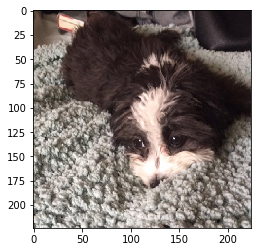

[ 0.92453767  0.07546233] 1.0


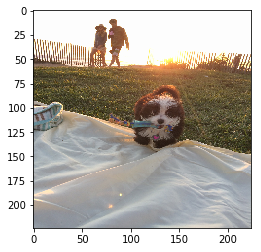

In [359]:
mis_class_vector = (svc.predict(x_val) != y_val)
mis_class = x_img[mis_class_vector]
for i in range(mis_class.shape[0]):
    print(svc.predict_proba(x_val)[mis_class_vector][i], y_val[mis_class_vector][i])
    plt.imshow(mis_class[i].astype('uint8'))
    plt.show()